In [190]:
#Importing Libraries

In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm



In [6]:
from zipfile import ZipFile
file_name = '/content/images.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
img_file='/content/images'
filenames = []
for file in os.listdir(img_file):
  filenames.append(os.path.join(img_file,file))


In [4]:
len(filenames)

3198

In [1]:
#trial
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from sklearn.neighbors import NearestNeighbors

# Step 1: Load and preprocess the image data
img_file = '/content/images'
filenames = []
images = []

for file in os.listdir(img_file):
    filenames.append(os.path.join(img_file, file))
    img = Image.open(os.path.join(img_file, file)).convert('RGB')
    img = img.resize((224, 224))  # Resize images to a consistent size
    img = np.array(img) / 255.0  # Normalize pixel values
    images.append(img)

images = np.array(images)

# Step 2: Define and train an autoencoder model
input_img = Input(shape=(224, 224, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(images, images, epochs=5, batch_size=16, shuffle=True)



Epoch 1/5
81/81 [==============================] - 149s 2s/step - loss: 0.3369
Epoch 2/5
81/81 [==============================] - 147s 2s/step - loss: 0.2293
Epoch 3/5
81/81 [==============================] - 147s 2s/step - loss: 0.2207
Epoch 4/5
81/81 [==============================] - 154s 2s/step - loss: 0.2183
Epoch 5/5
81/81 [==============================] - 148s 2s/step - loss: 0.2172


In [27]:
# Step 3: Use the trained model to encode images into a lower-dimensional space
encoder_model = Model(input_img, encoded)
encoded_images = encoder_model.predict(images)

# Step 4: Calculate similarities between the encoded representations of images
#neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
#neighbors.fit(encoded_images)
# Reshape encoded_images to 2D array

encoded_images_2d = encoded_images.reshape(encoded_images.shape[0], -1)

# Step 4: Calculate similarities between the encoded representations of images
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
neighbors.fit(encoded_images_2d)





41/41 [==============================] - 17s 398ms/step


NearestNeighbors(algorithm='brute', metric='euclidean')

In [30]:
# Step 5: Find similar images based on the input image
input_image_index = 2  # Index of the input image in the filenames list
#input_image="/content/images/11777.jpg"
input_image_encoded = encoder_model.predict(np.expand_dims(images[input_image_index], axis=0))
#input_image_encoded = encoder_model.predict(np.expand_dims(input_image, axis=0))

input_image_encoded_flat = input_image_encoded.reshape(1, -1)
distances, indices = neighbors.kneighbors(input_image_encoded_flat)

print("Similar images to input image:")
for i, index in enumerate(indices[0]):
    print(filenames[index])

1/1 [==============================] - 0s 42ms/step
Similar images to input image:
/content/images/11567.jpg
/content/images/11574.jpg
/content/images/11541.jpg
/content/images/11565.jpg
/content/images/11536.jpg


In [40]:
from keras.preprocessing import image
input_image_path = "/content/images/10047.jpg"
input_image = image.load_img(input_image_path, target_size=(224, 224))
input_image_array = image.img_to_array(input_image)
input_image_array = np.expand_dims(input_image_array, axis=0)  # Add batch dimension
input_image_array = input_image_array / 255.0  # Normalize pixel values

# Predict the encoded representation of the input image
input_image_encoded = encoder_model.predict(input_image_array)

# Reshape encoded image to 1D array
input_image_encoded_flat = input_image_encoded.flatten()

# Calculate similarities between the encoded representations of images
distances, indices = neighbors.kneighbors([input_image_encoded_flat])

output=[]
# Print similar images
print("Similar images to input image:")
for i, index in enumerate(indices[0]):
    print(filenames[index])
    output.append(str(filenames[index]))

1/1 [==============================] - 0s 61ms/step
Similar images to input image:
/content/images/10047.jpg
/content/images/10991.jpg
/content/images/10048.jpg
/content/images/10439.jpg
/content/images/10884.jpg


In [41]:
from IPython.display import Image
print(filenames[0])

/content/images/11035.jpg


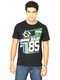

In [42]:

Image(output[0])



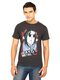

In [43]:
Image(output[1])



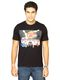

In [44]:
Image(output[2])


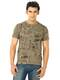

In [45]:
Image(output[3])


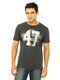

In [46]:
Image(output[4])